In [3]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#from IPython.core.display import display
from IPython.display import HTML

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

In [4]:
## Custom imports
from scipy.stats import poisson, norm
from math import ceil
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.cm import jet
import pandas as pd
from tqdm import trange
from typing import Tuple
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10792: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.ajmarkwick.net/">Dr. Andrew Markwick</a> - Twitter <a href="https://twitter.com/AndrewMarkwick">@AndrewMarkwick</a><br>
            <a href="www.oms-lab.org">Dr. Patrick Parkinson</a>
        </div>
    </div>
</div>

# Chapter 10

## Syllabus

1. Probabilities and interpretations
2. Probability distributions
3. Parameter estimation
4. Maximum likelihood
5. Least square, chi2, correlations
6. Monte Carlo basics
7. Goodness of fit tests
8. Hypothesis testing
9. Probability and confidence level
10. **Limit setting**
11. Introduction to multivariate analysis techniques

## Topics

**[10 Limit setting](#10-Limit-setting)**

**[10.1 Coverage](#10.1-Coverage)**
- 10.1.1 Definition of coverage
- 10.1.2 Measurement of a constrained quantity

**[10.2 The issue of flip-flopping](#10.2-The-issue-of-flip-flopping)**
- 10.2.1 Combining different approaches
- 10.2.2 Flip-flopping
- 10.2.3 Poisson belts

**[10.3 The Feldman-Cousins method](#10.3-The-Feldman-Cousins-method)**
- 10.3.1 Description of the method and application to Poisson intervals
- 10.3.2 Application to Gaussian confidence belts

## 10 Limit setting

Confidence Levels were introduced in Chapters 8 and 9. These were mostly discussed in scenarios not affected by limitations of the parameters that are being assessed. In this part we cover the somewhat more complicated situation when physical boundaries apply, e.g. that a quantity has to be positive (e.g. a mass).

This Chapter largely follows a paper by Feldman and Cousins: <a href="https://journals.aps.org/prd/abstract/10.1103/PhysRevD.57.3873">Phys. Rev. D57 (1998) 3873</a>. This is an excellent paper well worth a read.

Below is a hypothetical confidence belt based on Gaussian probability density functions with varying mean and width. In this example the parameters are

mean $ = 2 + 3 \times \sqrt{\mu}$,

and

standard deviation $ = 0.5 + 0.05 \times \mu$.

As we are now dealing with a continuous variable, the confidence level covered by each horizontal band is exactly 90%.

A problem arises if we want to assign a confidence interval for $\mu$ for a measured value around $x=1$.

<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1759331771.py:78: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


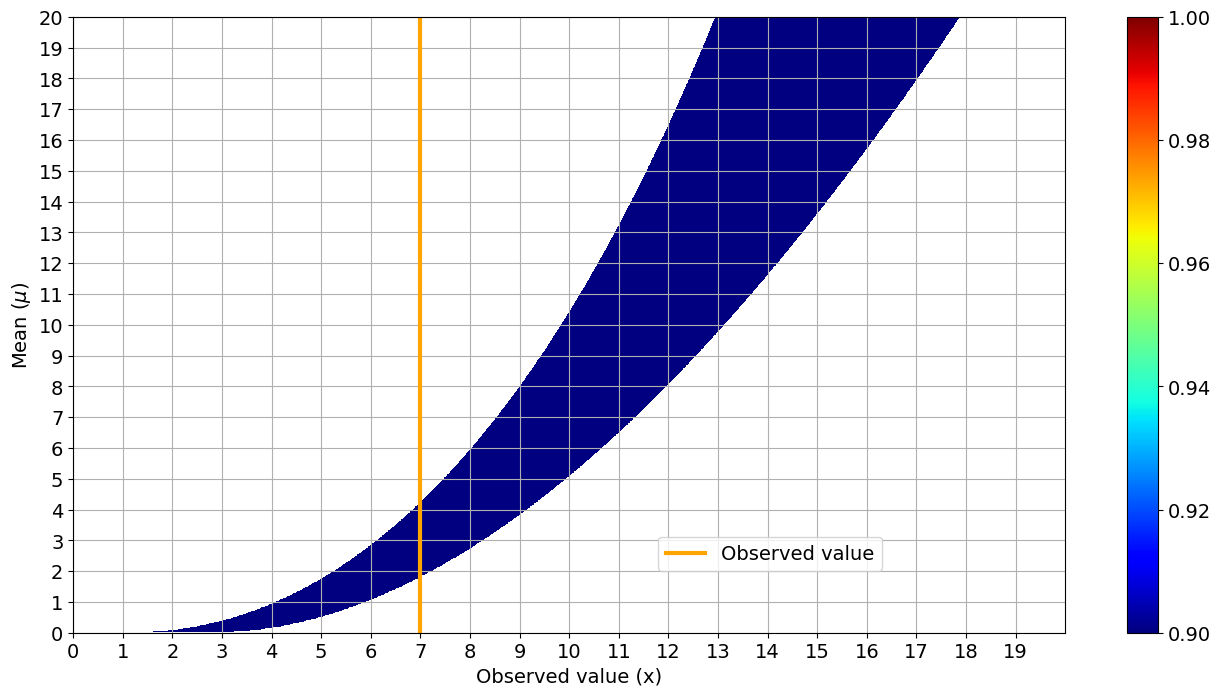

In [5]:
def calculate_confidence_interval(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float, float]:
    """
    Calculate the central confidence interval for a normal distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.9 for 90%)
        mean: Mean of the normal distribution
        std_dev: Standard deviation of the normal distribution
    
    Returns:
        lower_bound: Lower boundary of confidence interval
        upper_bound: Upper boundary of confidence interval
        coverage: Actual coverage probability
    """
    # Calculate boundaries for central interval
    lower_bound = norm.ppf(0.5 * (1 - confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5 * (1 - confidence_level) + confidence_level, mean, std_dev)
    
    # Calculate actual coverage probability
    coverage = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, upper_bound, coverage

# Set main parameters
CONFIDENCE_LEVEL = 0.9  # 90% confidence level
N_SAMPLES = 1000       # Number of points to sample
MAX_MEAN = 20.0       # Maximum mean value to consider
MAX_X = 20            # Maximum x-axis value

# Initialize lists for confidence belt visualization
confidence_intervals = []
coverage_values = []

# Calculate confidence intervals for different mean values
for i in range(1, N_SAMPLES):
    # Calculate mean value for this sample
    current_mean = MAX_MEAN * i / N_SAMPLES
    
    # Define mean and std dev using model functions
    model_mean = 2.0 + 3.0 * np.sqrt(current_mean)
    model_std = 0.5 + current_mean / MAX_MEAN
    
    # Calculate confidence interval
    lower, upper, coverage = calculate_confidence_interval(
        CONFIDENCE_LEVEL, model_mean, model_std
    )
    
    # Create rectangle for visualization
    interval_width = upper - lower
    interval_height = MAX_MEAN / N_SAMPLES
    confidence_intervals.append(Rectangle((lower, current_mean), 
                                       interval_width, interval_height))
    coverage_values.append(coverage)

# Create visualization
fig, ax = plt.subplots(figsize=(16, 8))

# Create confidence belt collection
confidence_belt = PatchCollection(confidence_intervals, alpha=1.0, cmap='jet')
confidence_belt.set_array(np.array(coverage_values))
confidence_belt.set_clim([0.9, 1])

# Set up plot
ax.add_collection(confidence_belt)
ax.set_xlim(0, MAX_X)
ax.set_ylim(0, MAX_MEAN)

# Add grid and labels
ax.set_yticks([MAX_MEAN * x/20 for x in range(21)])
ax.set_xticks(range(MAX_X))
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

# Add observed value line
ax.plot([7.0]*2, [0, MAX_MEAN], label='Observed value', 
        color='orange', linewidth=3)
ax.legend(loc=[0.59, 0.10])

# Add colorbar and display
plt.colorbar(confidence_belt)
plt.show()

### 10.1 Coverage

#### 10.1.1 Definition of coverage

The construction of confidence belts, which we discussed previously, is based on defining horizontal intervals according to a certain confidence level $C$. These can be constructed as central confidence intervals according to

$$P(x<x_1|\mu)=P(x>x_2|\mu)=(1-C)/2,$$

or as upper confidence limit intervals

$$P(x<x_1|\mu)=1-C.$$

For a given measured value of $x_0$, these then lead to an interval for $\mu$ with

$$P(\mu\in[\mu_1,\mu_2])=C.$$

This statement means that the unknown true value of $\mu$, $\mu_t$ lies within the interval $[\mu_1,\mu_2]$ in a fraction $C$ of the experiments conducted.

This equation being satisfied indicates that the intervals _cover_ $\mu$ at the stated confidence, or that they have the correct _coverage_.

Alternatively, the case when

$$P(\mu\in[\mu_1,\mu_2])<C,$$

is called _undercoverage_. This is a serious issue as this implies the existence of more information than is the case in reality.

Conversely,

$$P(\mu\in[\mu_1,\mu_2])>C,$$

is called _overcoverage_ , which is in most cases a less severe issue, but it leads to a loss of rejection power against false hypotheses. This case is sometimes called conservatism. Being conservative is never optimal and one should always strive to make estimates as accurate as possible.

#### Recap: Confidence levels from Gaussians

In the case of Gaussian distribution functions, the construction becomes very simple. The $x_-$ and $x_+$ curves become straight lines and the limits are obtained simply by $\mu_\pm=x_0\pm n\sigma$, where $n=1$ for 68% confidence level, $n=1.64$ for 90% confidence level, and so on.

This is a simplified case of the introductory example above.

<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/2204065105.py:84: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


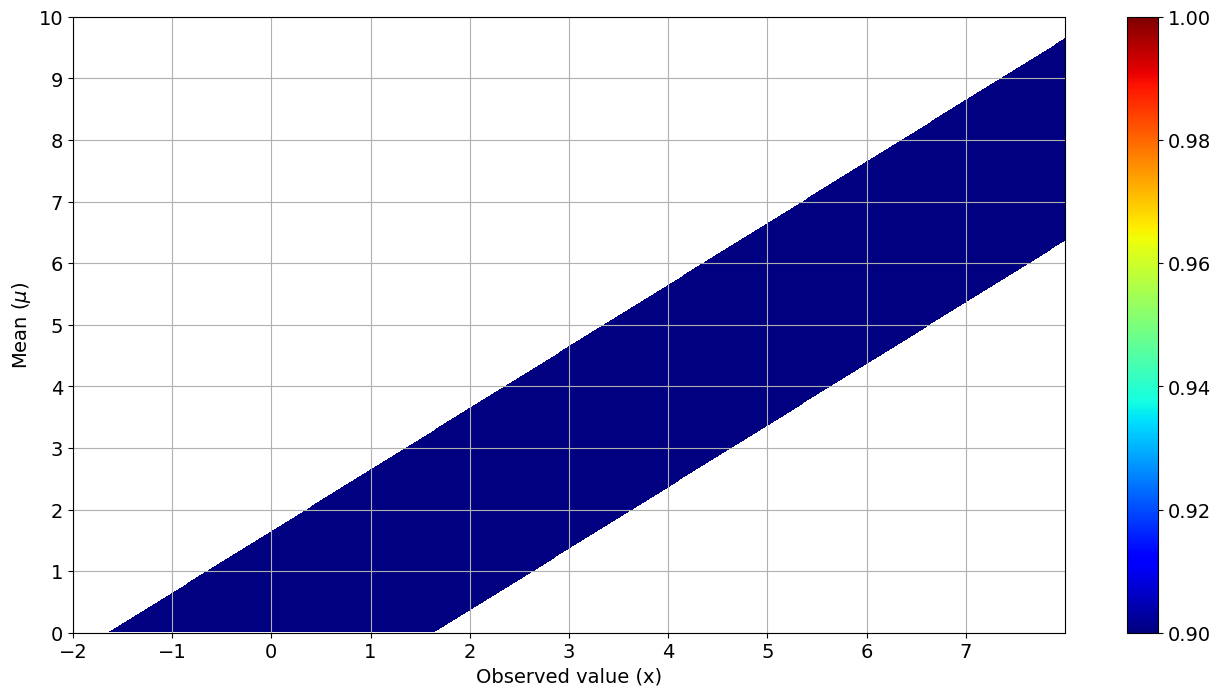

In [14]:
from typing import Tuple
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from math import ceil
from matplotlib.cm import jet

def calculate_confidence_interval(
    confidence_level: float, 
    mean: float, 
    std_dev: float
) -> Tuple[float, float, float]:
    """
    Calculate the confidence interval for a Gaussian distribution.
    
    Args:
        confidence_level: Desired confidence level (e.g., 0.9 for 90%)
        mean: Mean of the Gaussian distribution
        std_dev: Standard deviation of the Gaussian distribution
    
    Returns:
        lower_bound: Lower bound of confidence interval
        upper_bound: Upper bound of confidence interval
        actual_coverage: Actual probability coverage
    """
    # Calculate bounds using inverse CDF (percent point function)
    lower_bound = norm.ppf(0.5*(1-confidence_level), mean, std_dev)
    upper_bound = norm.ppf(0.5*(1-confidence_level) + confidence_level, mean, std_dev)
    
    # Calculate actual probability coverage between bounds
    actual_coverage = norm.cdf(upper_bound, mean, std_dev) - norm.cdf(lower_bound, mean, std_dev)
    
    return lower_bound, upper_bound, actual_coverage

# Set visualization parameters
confidence_level = 0.9  # 90% confidence level
n_samples = 1000       # Number of samples for visualization
max_mean = 10.0        # Maximum mean value to display
plot_x_min = -2.0      # Minimum x-axis value
plot_x_max = 8.0       # Maximum x-axis value
std_dev = 1.0          # Standard deviation

# Initialize collections for visualization
confidence_intervals = []
coverage_probabilities = []

# Calculate confidence intervals for different mean values
for i in range(1, n_samples):
    # Calculate mean value for this iteration
    current_mean = max_mean * i / n_samples
    
    # Calculate confidence interval
    lower, upper, prob = calculate_confidence_interval(
        confidence_level, current_mean, std_dev
    )
    
    # Create rectangle for visualization (width = interval, height = step size)
    interval_width = upper - lower
    height = max_mean/n_samples
    confidence_intervals.append(Rectangle((lower, current_mean), interval_width, height))
    coverage_probabilities.append(prob)

# Create collection of confidence intervals for plotting
confidence_belt = PatchCollection(confidence_intervals, alpha=1.0, cmap=jet)
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])  # Set color scale for coverage probability

# Create and configure plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(plot_x_min, plot_x_max)
ax.set_ylim(0, max_mean)

# Add confidence belt to plot
ax.add_collection(confidence_belt)

# Configure axis ticks and labels
ax.set_yticks([max_mean*x/10. for x in range(11)])
ax.set_xticks([plot_x_min + x for x in range(ceil(plot_x_max-plot_x_min))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

# Add colorbar to show coverage probability
plt.colorbar(confidence_belt)
plt.show()

#### 10.1.2 Measurement of a constrained quantity

Let us consider the measurement of a mass. 

Assuming this measurement occurs with Gaussian uncertainties, we have the probability distribution function

$$P(x|\mu)=\frac{1}{\sqrt{2\pi}\sigma}e^{-(x-\mu)^2/2\sigma^2}.$$

The construction with a confidence belt fails miserably when a negative mass is measured with a relatively small uncertainty, e.g. $ (-0.5\pm0.2) $ g. When trying to construct a 90\% confidence interval, we would get $ \mu_{ \pm } = (-0.5\pm0.2\times 1.64) $ g, i.e. even $\mu_+=-0.172~$ g remains negative.

A solution to this issue is a Bayesian construction with a normalisation that takes the physical limit into account. For example for positive masses, one gets

$$P(\mu|x)=\frac{e^{-(x-\mu)^2/2\sigma^2}}{\int_0^\infty e^{-(x-\mu')^2/2\sigma^2}d\mu'}(\mu>0).$$

This construction will then lead to one limit being zero, i.e. we set an upper limit. 

We will now discuss the limitations of this approach.

The Bayesian construction above leads to generally useful upper limits. Its main drawback is that its construction is not independent of the measured value; in fact, it is a vertical construction as the interval is calculated for each possible observed value. This does not a priori give control over the coverage of the horizontal intervals.

The colourscale in the plot below illustrates the horizontal coverage for the limit that is derived, i.e. if a measured value $x$ leads to a limit of $\mu$, the colour of the vertical band at $x$ corresponds to $\int_x^\infty {\rm Gauss}(x',\mu,\sigma)dx'$.

This shows that despite the vertical construction, the Bayesian formula ensures correct coverage or overcoverage, i.e. it avoids undercoverage.

<>:86: SyntaxWarning: invalid escape sequence '\m'
<>:86: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/895188267.py:86: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


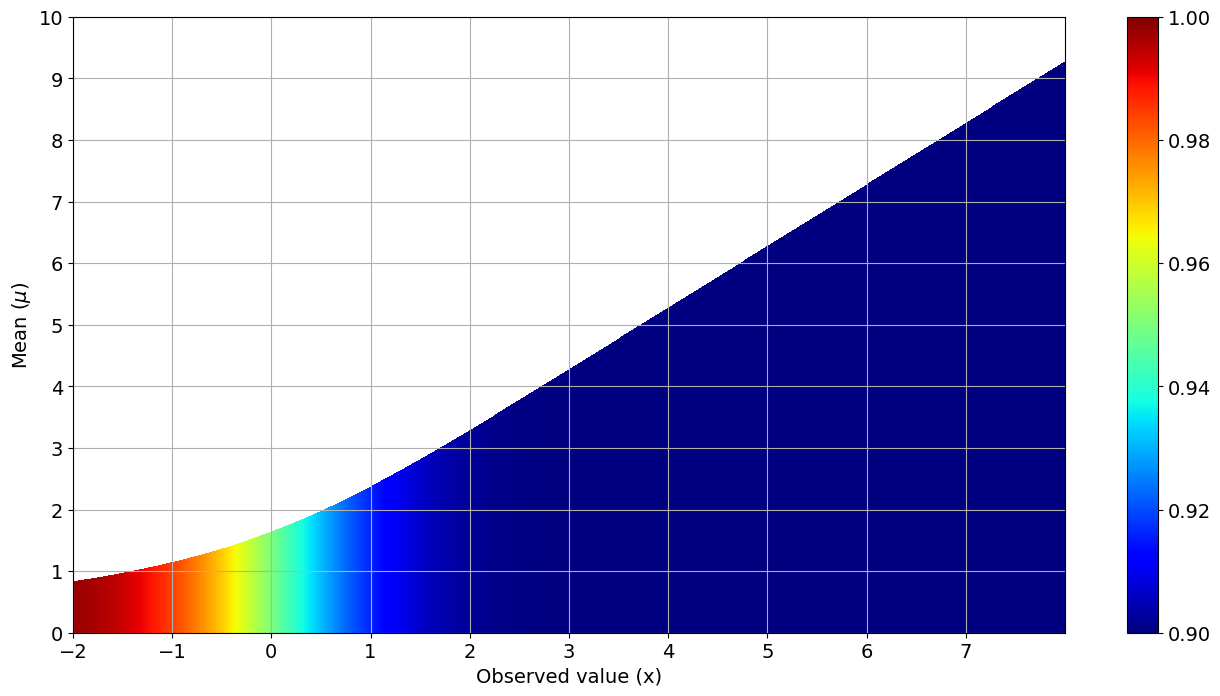

In [15]:
from typing import Tuple
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from scipy.stats import norm
import matplotlib.pyplot as plt
from math import ceil

def calculate_bayesian_bounds(confidence_level: float, observed_value: float, 
                            measurement_uncertainty: float) -> Tuple[float, float]:
    """
    Calculate the Bayesian confidence bounds for a physically constrained parameter.
    
    Args:
        confidence_level: The desired confidence level (e.g., 0.9 for 90% CL)
        observed_value: The measured value
        measurement_uncertainty: The measurement uncertainty (sigma)
    
    Returns:
        upper_bound: The upper bound of the confidence interval
        probability: The actual coverage probability
    """
    # Calculate normalization factor (probability of physical measurement)
    normalization = norm.cdf(observed_value, loc=0, scale=measurement_uncertainty)
    
    # Calculate upper bound using inverse CDF (percent point function)
    upper_bound = norm.ppf((1-normalization) + confidence_level*normalization, 
                          loc=observed_value, scale=measurement_uncertainty)
    
    # Calculate actual coverage probability
    coverage_prob = 1.0 - norm.cdf(observed_value, loc=upper_bound, 
                                 scale=measurement_uncertainty)
    
    return upper_bound, coverage_prob

# Set statistical and plotting parameters
CONFIDENCE_LEVEL = 0.9
N_POINTS = 1000  # Number of points for smooth visualization
MEASUREMENT_SIGMA = 1.0

# Define plot ranges
MAX_MEAN = 10.0
X_MIN, X_MAX = -2.0, 8.0

# Initialize collections for confidence belt visualization
belt_patches = []
coverage_probabilities = []

# Calculate confidence belt points
for i in range(1, N_POINTS):
    # Calculate observed value for this point
    observed_x = X_MIN + (X_MAX - X_MIN) * i / N_POINTS
    
    # Lower bound is always 0 (physical constraint)
    lower_bound = 0
    
    # Calculate upper bound and coverage probability
    upper_bound, prob = calculate_bayesian_bounds(CONFIDENCE_LEVEL, observed_x, 
                                                MEASUREMENT_SIGMA)
    
    # Create rectangle for visualization
    width = (X_MAX - X_MIN) / N_POINTS
    height = upper_bound - lower_bound
    belt_patches.append(Rectangle((observed_x, 0), width, height))
    coverage_probabilities.append(prob)

# Create the confidence belt collection
confidence_belt = PatchCollection(belt_patches, alpha=1.0, cmap='jet')
confidence_belt.set_array(np.array(coverage_probabilities))
confidence_belt.set_clim([0.9, 1])

# Create and configure the plot
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_xlim(X_MIN, X_MAX)
ax.set_ylim(0, MAX_MEAN)

# Add the confidence belt to the plot
ax.add_collection(confidence_belt)

# Configure axes and grid
ax.set_yticks([MAX_MEAN * x/10 for x in range(11)])
ax.set_xticks([X_MIN + x for x in range(ceil(X_MAX-X_MIN))])
ax.grid(which='both', axis='x')
ax.grid(which='major', axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(confidence_belt)
plt.show()

##### Limitations of central confidence belts

Let us continue to consider the example of a Gaussian probability density function.

If we decide _a priori_ to construct central intervals, we get the confidence belt already shown above.

This belt achieves correct coverage for all allowed values of $\mu$. However, as the measured value $x_0$ gets more and more negative the corresponding interval $\mu_\pm$ tends towards the empty set, which is reached for $x_0\le-1.64\sigma$.

This is clearly an unsatisfactory result. One alternative might be to continue the confidence belt to negative values of $\mu$, but this is similarly unsatisfactory as obtaining a set $\mu_\pm$ with a negative $\mu_-$ does not really make sense as we would know that any negative values of $\mu$ are unphysical.

Furthermore, the probability distribution function $P(x|\mu)$ may be ill-defined for negative $\mu$.

##### Limitations of upper confidence intervals

We can similarly to the previous case set out _a priori_ to construct upper limit intervals.

In this case the same problem arises for negative measured values with the continuation to negative values of $\mu$ being equally unsatisfactory.

<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/3621253843.py:42: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


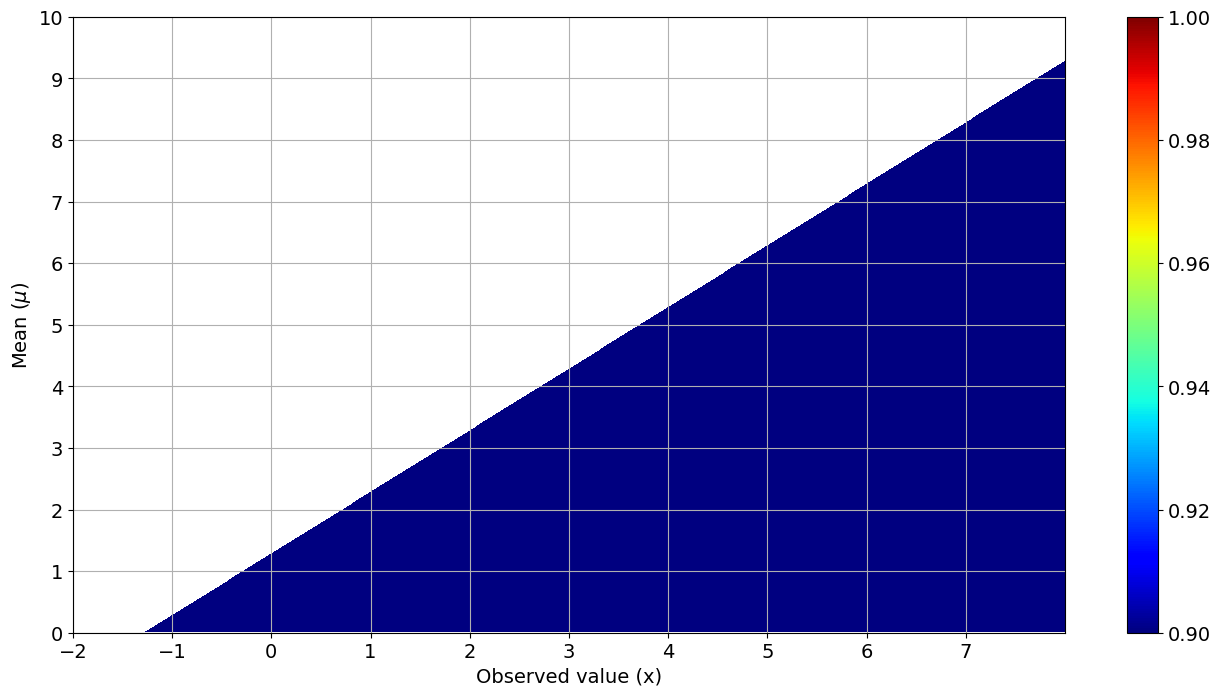

In [8]:
def get_central_interval(cl, mu, sig):
    # calculate r- and r+ based on pre-defined functions
    xm = norm.ppf(0.5*(1-cl)     , mu, sig)
    xp = norm.ppf(0.5*(1-cl) + cl, mu, sig)
    return xm, xp, norm.cdf(xp,mu,sig)-norm.cdf(xm,mu,sig)

def get_upper_interval(cl, mu, sig):
    # calculate r- and r+ based on pre-defined functions
    xm = norm.ppf(1-cl, mu, sig)
    return xm, 1.-norm.cdf(xm,mu,sig)

cl = 0.9
nSamples = 1000 # defines granularity in y (=probability)
norm_patches = []
norm_colors = []
max_mean = 10.
min_x = -2.
max_x = 8.
sigma = 1.
for i in range(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    xm, p = get_upper_interval(cl, mean, sigma) # use funny function for mean and linearly increasing sigma
    xp = max_x
    norm_patches.append( Rectangle((xm,mean),xp-xm,max_mean/nSamples) ) # define drawing object for confidence interval
    norm_colors.append(p)
norms = PatchCollection(norm_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
norms.set_array(np.array(norm_colors))
norms.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(min_x,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(norms) # draw belt

# plot optics
ax.set_yticks([max_mean*x/10. for x in range(11)])
ax.set_xticks([min_x + x for x in range(ceil(max_x-min_x))])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(norms)
plt.show()


$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

### 10.2 The issue of flip-flopping

#### 10.2.1 Combining different approaches

As a remedy for not being able to quote intervals for negative measurement results one might decide to combine these approaches, for example according to the following recipe:
- For a measured value above $3\sigma$ we quote a central interval.
- For a less significant value we quote an upper limit.
- For a negative measured value we quote a constant upper limit, the same as for $x_0=0$.

This is illustrated below for 90% intervals.

<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1650265854.py:62: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


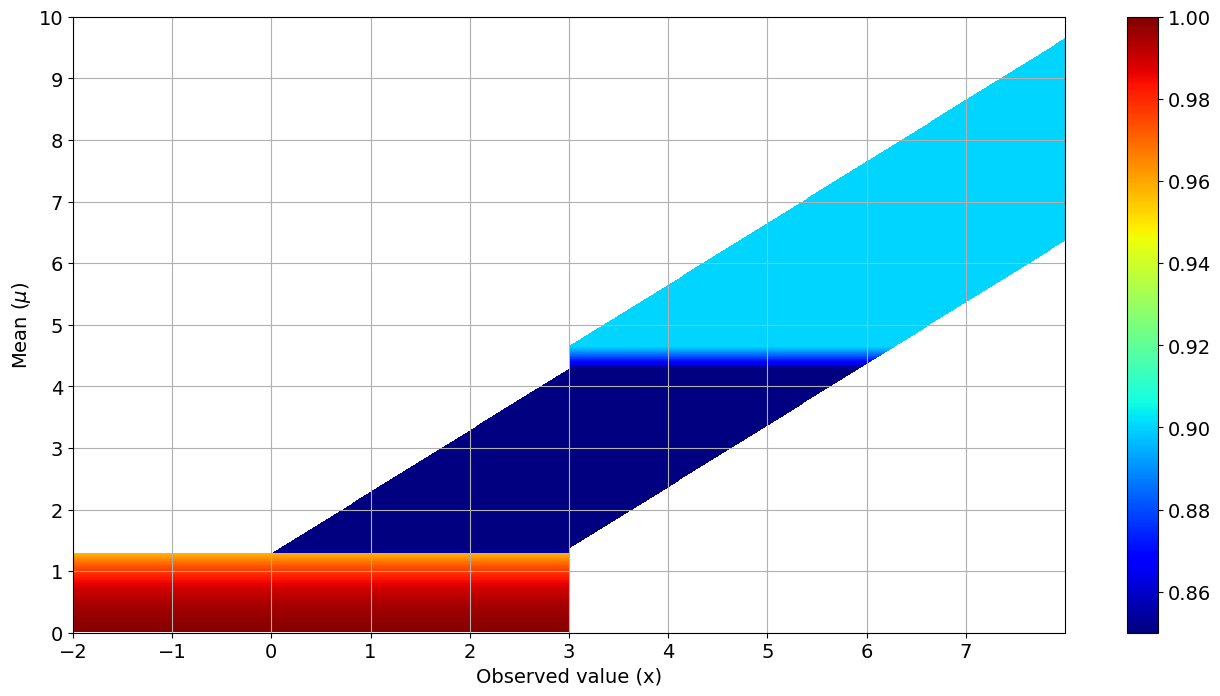

In [9]:
def get_central_interval(cl, mu, sig):
    # calculate r- and r+ based on pre-defined functions
    xm = norm.ppf(0.5*(1-cl)     , mu, sig)
    xp = norm.ppf(0.5*(1-cl) + cl, mu, sig)
    return xm, xp

def get_upper_interval(cl, mu, sig):
    # calculate r- and r+ based on pre-defined functions
    xm = norm.ppf(1-cl, mu, sig)
    return xm

def get_prob(xm,xp,mu,sig):
    return norm.cdf(xp,mu,sig)-norm.cdf(xm,mu,sig)

cl = 0.9
nSamples = 1000 # defines granularity in y (=probability)
norm_patches = []
norm_colors = []
max_mean = 10.
min_x = -2.
max_x = 8.
sigma = 1.
for i in range(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    xm_u = get_upper_interval(cl, mean, sigma) # x_minus for upper limit
    xm_c, xp_c = get_central_interval(cl, mean, sigma) # x_+/- for central interval
    if xm_c > 3:
        xm = xm_c
    elif xm_c <= 3 and xm_u > 3:
        xm = 3.
    elif xm_u > 0:
        xm = xm_u
    else:
        xm = min_x
    if xp_c > 3:
        xp = xp_c
    else:
        xp = 3.
    if min_x == xm:
        p = get_prob(-99.,xp,mean,sigma)
    else:
        p = get_prob(xm,xp,mean,sigma)
    xp = min(xp, max_x)
    norm_patches.append( Rectangle((xm,mean),xp-xm,max_mean/nSamples) ) # define drawing object for confidence interval
    norm_colors.append(p)
norms = PatchCollection(norm_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
norms.set_array(np.array(norm_colors))
norms.set_clim([0.85, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(min_x,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(norms) # draw belt

# plot optics
ax.set_yticks([max_mean*x/10. for x in range(11)])
ax.set_xticks([min_x + x for x in range(ceil(max_x-min_x))])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed value (x)')
ax.set_ylabel('Mean ($\mu$)')

plt.colorbar(norms)
plt.show()


#### 10.2.2 Flip-flopping

You should have received sufficient warnings about fully defining your procedure prior to performing the measurement that this measurement-dependent recipe should set off some alarm bells.

Let's have a look at the coverage of this approach.

For $\mu=2$ the coverage is too low as the right-hand limit is defined by the central interval belt, which appears to be shifted up compared to the upper limit belt. Therefore, the intervals undercover, which is problematic.

Also, considering $\mu=1$, it is apparent that the intervals overcover. More generally, for $\mu$ between $0$ and about $1.2$ the coverage obviously varies as the interval stays constant while $P(x|\mu)$ changes.


#### 10.2.3 Poisson belts

In the case of a counting experiment we have to use Poisson intervals, which have the particularity of leading to stair-like plots as they refer to a discrete distribution, i.e. we can only observe whole events.

In such experiments we are often interested in identifying a particular signal in the presence of background events.

The Poisson distribution function in the presence of a known amount of background, $b$, is

$$P(n|\mu,b)=e^{-(\mu+b)}\frac{(\mu+b)^n}{n!}.$$

As discussed before, when defining confidence intervals we rather overcover as we are in general unable to hit the desired confidence level exactly.

The following plots show the resulting confidence belts for central intervals and upper limits. They assume $b=3$.

<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/3343356159.py:38: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Mean count ($\lambda$)')


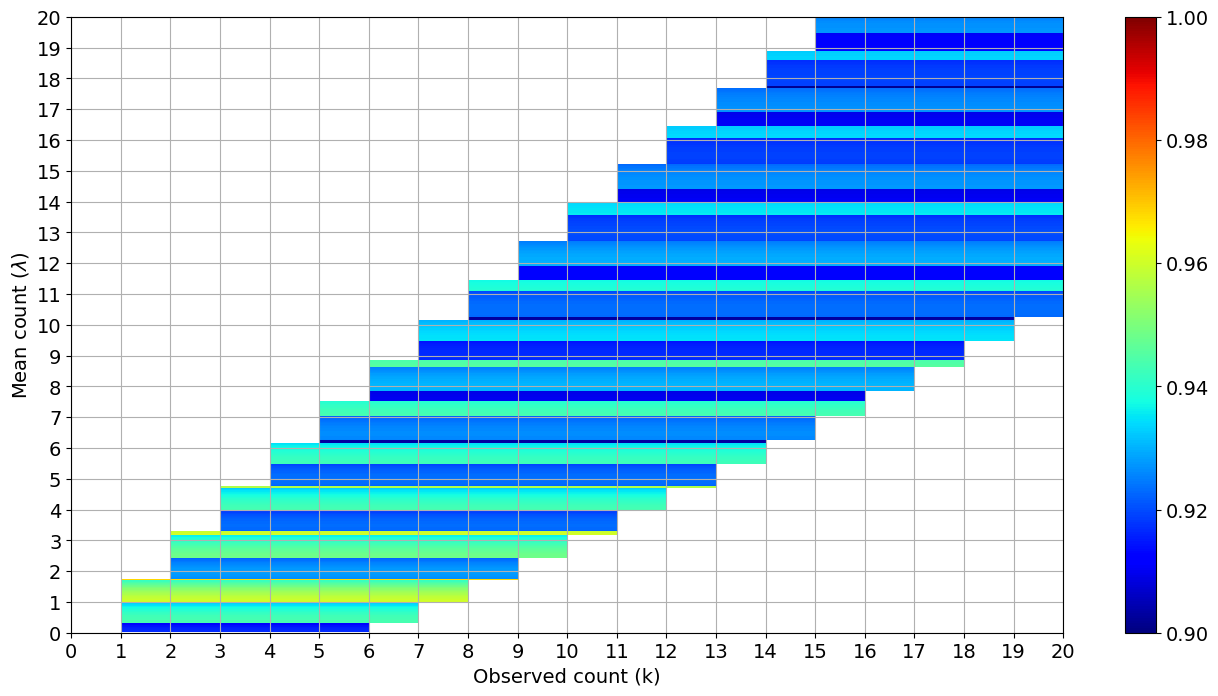

In [10]:
def get_central_interval(cl, l):
    # calculate r- and r+ based on pre-defined functions
    km = poisson.ppf(0.5*(1-cl)     , l)
    kp = poisson.ppf(0.5*(1-cl) + cl, l)
    if km > 0: 
        return km, kp, poisson.cdf(kp,l)-poisson.cdf(km-1,l)
    else:
        return km, kp, poisson.cdf(kp,l)

cl = 0.9
nSamples = 1000 # defines granularity in y (=probability)
poisson_patches = []
poisson_colors = []
max_mean = 20.
max_x = 20
background = 3
for i in range(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    km, kp, p = get_central_interval(cl, mean+background) # use fast implementation
    poisson_patches.append( Rectangle((km,mean),kp-km,max_mean/nSamples) ) # define drawing object for confidence interval
    poisson_colors.append(p)
poissons = PatchCollection(poisson_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
poissons.set_array(np.array(poisson_colors))
poissons.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(poissons) # draw belt

# plot optics
ax.set_yticks([max_mean*x/20. for x in range(21)])
ax.set_xticks([x for x in range(max_x+1)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Mean count ($\lambda$)')

plt.colorbar(poissons)
plt.show()


<>:38: SyntaxWarning: invalid escape sequence '\l'
<>:38: SyntaxWarning: invalid escape sequence '\l'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/71500788.py:38: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Mean count ($\lambda$)')


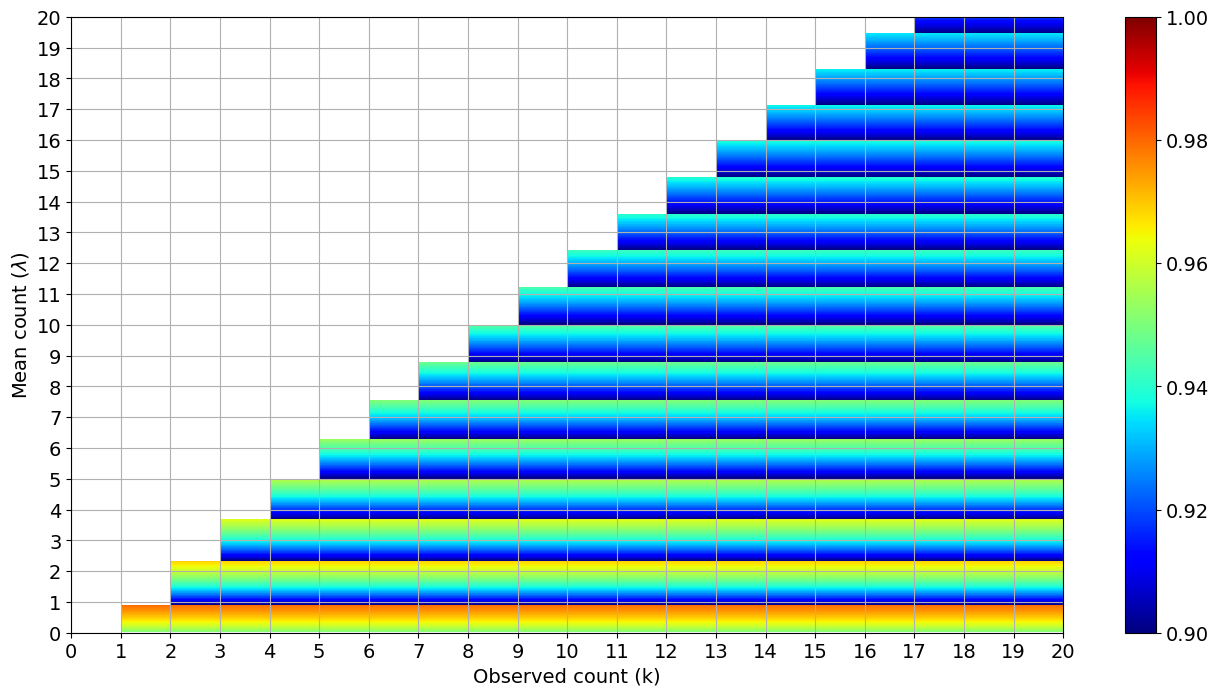

In [11]:
def get_upper_interval(cl, l):
    # calculate r- and r+ based on pre-defined functions
    km = poisson.ppf(1-cl, l)
    if km > 0: 
        return km, 1.-poisson.cdf(km-1,l)
    else:
        return km, 1.

cl = 0.9
nSamples = 1000 # defines granularity in y (=probability)
poisson_patches = []
poisson_colors = []
max_mean = 20.
max_x = 20
background = 3
for i in range(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    km, p = get_upper_interval(cl, mean+background) # use fast implementation
    kp = max_x
    poisson_patches.append( Rectangle((km,mean),kp-km,max_mean/nSamples) ) # define drawing object for confidence interval
    poisson_colors.append(p)
poissons = PatchCollection(poisson_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
poissons.set_array(np.array(poisson_colors))
poissons.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(poissons) # draw belt

# plot optics
ax.set_yticks([max_mean*x/20. for x in range(21)])
ax.set_xticks([x for x in range(max_x+1)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Mean count ($\lambda$)')

plt.colorbar(poissons)
plt.show()


$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

$~$

### 10.3 The Feldman-Cousins method

#### 10.3.1 Description of the method and application to Poisson intervals

The issue of flip-flopping is caused by the mixture of vertical and horizontal construction of the confidence intervals. It is therefore desirable to have an approach that solely depends on a horizontal construction.

A purely horizontal construction cannot a priori define whether it results in an interval or an upper limit as this is, in the end, a result of a vertical cut through the confidence belt at the measured value.

Feldman and Cousins proposed the following alternative approach. The method may appear a little contrived, but this is simply due to the fact that it is strictly restricted to a horizontal construction that does not pre-define whether a central interval or an upper limit is being constructed. 

The following example is based on a counting experiment (therefore involving Poisson distributions) with the presence of background.
This means that the total count $k$ will include a certain number $b$ of background events, where $b$ is assumed to be known.

It proceeds as follows:
- Consider the construction of a confidence interval of level $C$ for a given $\mu$.
- For each value of $k$ there is a value of $\mu$ that maximises $P(k|\mu)$ and this value shall be called $\mu_{\rm best}$.
- In our case this is simply $\mu_{\rm best}={\rm max}(0,k-b)$.
- Define the ratio $R=P(k|\mu)/P(k|\mu_{\rm best})$. Given that $\mu_{\rm best}$ maximises the probability distribution function, this ratio is between $0$ and $1$.
- Order all possible values of $k$ by their corresponding values of $R$ and, starting from the largest $R$, add the values of $k$ to the confidence interval until the sum of their probabilities exceeds $C$.

The relevant values for an example with $b=3$ and $\mu=0.5$ are given in the table below.
The probabilities of rank 1-7 add up to (compare the column 'CumulativeSum')

$$0.189+0.216+0.185+0.132+0.106+0.030+0.077 = 0.935,$$

which covers a 90% interval.

This construction leads to an automatic transition between one-sided and two-sided intervals and thereby gives a pre-defined transition from quoting a two-sided interval to an upper limit. Note that nowhere in this procedure does the observed number of events enter.

There are two caveats around the Feldman-Cousins method:
- In the case of having observed 0 events, a measurement with greater levels of expected background can lead to a lower upper limit compared to a measurement with fewer expected background events.
- The approach does not readily allow the inclusion of so-called nuisance parameters, which are used to account for systematic uncertainties. However, alternatives exist that mitigate this issue, but that's outside the scope of this course.

Below is the corresponding table of numbers to follow the method for $\mu=0.5$ and the complete confidence belt.

<>:66: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\l'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:66: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Mean count ($\lambda$)')


Calculating P(n|mu_best)
Calculating intervals


  0%|          | 0/399 [00:00<?, ?it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
  1%|          | 2/399 [00:00<00:21, 18.58it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290

Table for mu =  0.5
     k       P(k|mu) mu_best  P(k|mu_best)             R  CumulativeSum
4    4  1.888123e-01       1      0.195367  9.664501e-01       0.188812
3    3  2.157855e-01       0      0.224042  9.631482e-01       0.404598
2    2  1.849590e-01       0      0.224042  8.255556e-01       0.589557
5    5  1.321686e-01       2      0.175467  7.532375e-01       0.721725
1    1  1.056908e-01       0      0.149361  7.076191e-01       0.827416
0    0  3.019738e-02       0      0.049787  6.065307e-01       0.857614
6    6  7.709835e-02       3      0.160623  4.799953e-01       0.934712
7    7  3.854917e-02       4      0.149003  2.587145e-01       0.973261
8    8  1.686526e-02       5      0.139587  1.208230e-01       0.990126
9    9  6.558714e-03       6      0.131756  4.977938e-02       0.996685
10  10  2.295550e-03       7      0.125110  1.834825e-02       0.998981
11  11  7.304022e-04       8      0.119378  6.118396e-03       0.999711
12  12  2.130340e-04       9      0.114368  

/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/290188548.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all

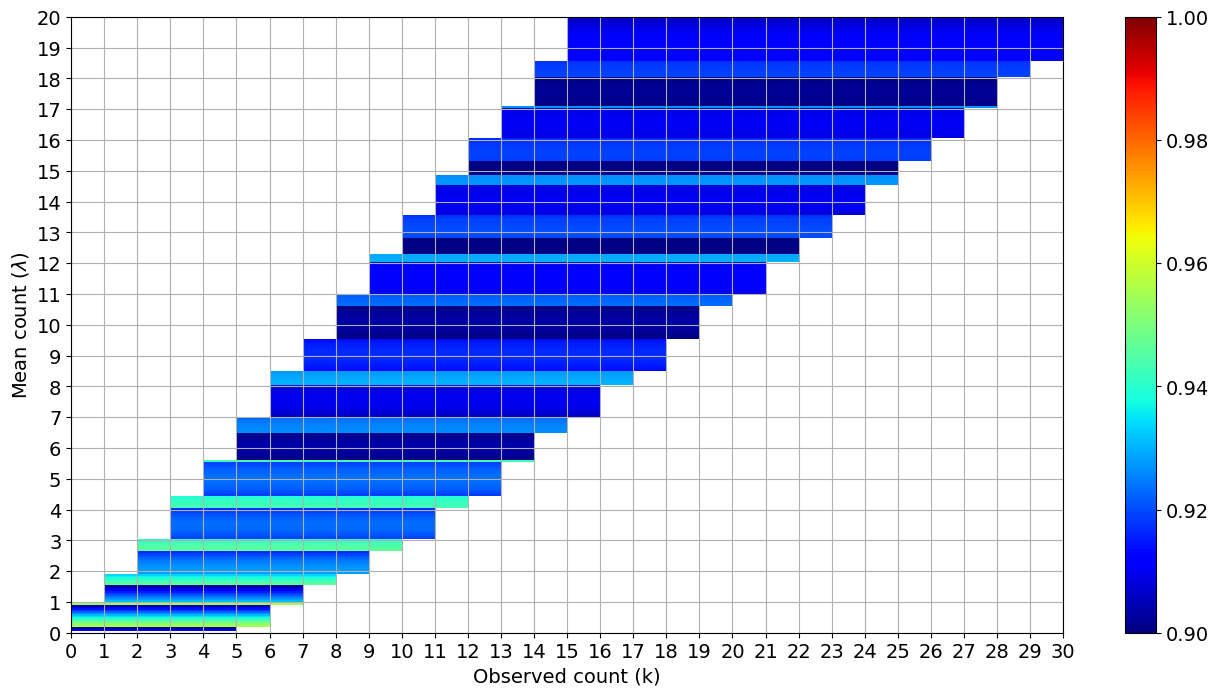

In [12]:
def get_prob(km,kp,l):
    if km > 0:
        return poisson.cdf(kp,l)-poisson.cdf(km-1,l)
    else:
        return poisson.cdf(kp,l)

cl = 0.9
nSamples = 400 # defines granularity in y, takes about 0.05s per sample
poisson_patches = []
poisson_colors = []
max_mean = 20.
max_x = 30
background = 3

print('Calculating P(n|mu_best)')
p_mubest = []
for k in range(max_x+1):
    mubest = max(0,k-background)
    p_mubest.append(poisson.pmf(k,mubest+background))

print('Calculating intervals')
for i in trange(1,nSamples):
    mean = max_mean * i / nSamples # translate into probability
    FC_table = pd.DataFrame(columns=['k','P(k|mu)','mu_best','P(k|mu_best)'])
    tmp = [FC_table]
    for k in range(max_x+1):
            mubest = max(0,k-background)
            p_this = poisson.pmf(k,mean+background)
            p_best = p_mubest[k]
            #print(mean,k,mubest,p_best,p_this)
            if 0 < p_best:
                #FC_table = FC_table.concat({'k':k,'P(k|mu)':p_this,'mu_best':mubest,'P(k|mu_best)':p_best}, ignore_index=True)
                tmp.append(pd.DataFrame({'k':k,'P(k|mu)':p_this,'mu_best':mubest,'P(k|mu_best)':p_best},index=[k]))
    FC_table = pd.concat(tmp, ignore_index=True)
    FC_table['R'] = FC_table['P(k|mu)'] / FC_table['P(k|mu_best)']
    FC_table = FC_table.sort_values('R',ascending = False)
    FC_table['CumulativeSum'] = FC_table['P(k|mu)'].cumsum()
    if 10 == i: 
        print('Table for mu = ',mean)
        print(FC_table)
    good_ks = FC_table.query('CumulativeSum < @cl')['k'].values
    good_ks = np.hstack([good_ks, FC_table.query('CumulativeSum >= @cl').head(1)['k'].values])
    #print(good_ks)
    km = good_ks.min()
    kp = good_ks.max()
    p = get_prob(km, kp, mean+background)
    kp = min(kp,max_x)
    poisson_patches.append( Rectangle((km,mean),kp-km,max_mean/nSamples) ) # define drawing object for confidence interval
    poisson_colors.append(p)
poissons = PatchCollection(poisson_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
poissons.set_array(np.array(poisson_colors))
poissons.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(poissons) # draw belt

# plot optics
ax.set_yticks([max_mean*x/20. for x in range(21)])
ax.set_xticks([x for x in range(max_x+1)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Observed count (k)')
ax.set_ylabel('Mean count ($\lambda$)')

plt.colorbar(poissons)
plt.show()


#### 10.3.2 Application to Gaussian confidence belts

For a Gaussian (i.e. continuous) variable the procedure is very similar. In short, it is:

- For a Gaussian distributed variable $\mu$ with boundary condition $\mu\ge0$, find the value of $\mu$ for which $P(x|\mu)$ is maximal and call this $\mu_{\rm best}$. This is given by $\mu_{\rm best}={\rm max}(0,x)$.

- Define the likelihood ratio

$$R(x)=\frac{P(x|\mu)}{P(x|\mu_{\rm best})}.$$

- For a given $\mu$ find the interval $[x_1,x_2]$ such that $R(x_1)=R(x_2)$ and $\int_{x_1}^{x_2}P(x|\mu)dx=C$, with $C$ the desired confidence level. This integral gives the accepted range for each value of $\mu$.

The condition $R(x_1)=R(x_2)$ replaces the explicit ordering and, provided that $R(x)$ is continuously falling on either side of $x=\mu_{\rm best}$, it uniquely defines the interval $[x_1,x_2]$ for a given $C$.

At $x=1.28$ the distribution transitions from a one-sided to a two-sided interval.

The full confidence belt is shown in the following plot.

##### Computation requirements

The continuous case requires calculating and sorting many values in $x$ for each value in $\mu$. The exact number is defined by the desired resolution of the plot. 

The plot below already takes several minutes to compute while it is based on a simple Gaussian function. However, here we knew the correct values for $\mu_{\rm best}$ a priori.

If $\mu_{\rm best}$ needs to be calculated, this can add considerable computation requirements.

In reality, this method is likely to be applied to much more complex probability densitiy functions, which take significantly longer to evaluate. Therefore, it can be computationally challenging to obtain a result with the Feldman-Cousins method.

<>:68: SyntaxWarning: invalid escape sequence '\m'
<>:68: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1172388739.py:68: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Mean ($\mu$)')


Calculating P(n|mu_best)
Calculating intervals


  0%|          | 0/399 [00:00<?, ?it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1172388739.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
  0%|          | 1/399 [00:00<02:26,  2.72it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1172388739.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
  1%|          | 2/399 [00:00<02:46,  2.38it/s]/var/folders/sq/1nn

Table for mu =  0.075
          x       P(x|mu)  mu_best  P(x|mu_best)             R  CumulativeSum
166  0.0750  3.989423e-01   0.0750      0.398942  1.000000e+00       0.004987
167  0.0875  3.989111e-01   0.0875      0.398942  9.999219e-01       0.009973
165  0.0625  3.989111e-01   0.0625      0.398942  9.999219e-01       0.014960
164  0.0500  3.988176e-01   0.0500      0.398942  9.996875e-01       0.019945
168  0.1000  3.988176e-01   0.1000      0.398942  9.996875e-01       0.024930
..      ...           ...      ...           ...           ...            ...
795  7.9375  1.503506e-14   7.9375      0.398942  3.768730e-14       0.981295
796  7.9500  1.362662e-14   7.9500      0.398942  3.415688e-14       0.981295
797  7.9625  1.234819e-14   7.9625      0.398942  3.095233e-14       0.981295
798  7.9750  1.118796e-14   7.9750      0.398942  2.804405e-14       0.981295
799  7.9875  1.013515e-14   7.9875      0.398942  2.540506e-14       0.981295

[800 rows x 6 columns]


/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1172388739.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
  2%|▏         | 6/399 [00:02<02:31,  2.59it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel_80859/1172388739.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  FC_table = pd.concat(tmp, ignore_index=True)
  2%|▏         | 7/399 [00:02<02:43,  2.40it/s]/var/folders/sq/1nnyt8dx16xcb3rm20k11c9m0000gp/T/ipykernel

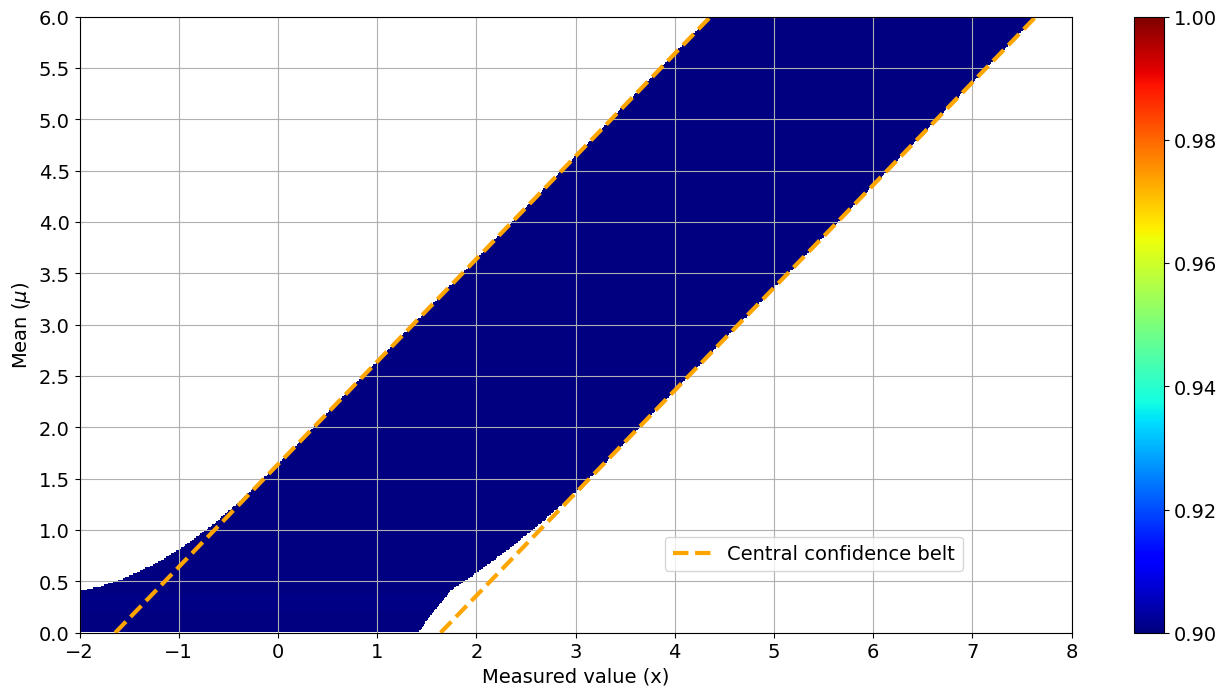

In [13]:
def get_prob(xm,xp,mu,sigma):
    return norm.cdf(xp,mu,sigma)-norm.cdf(xm,mu,sigma)

cl = 0.9
nSamplesX = 800 # defines granularity in x
nSamplesY = 400 # defines granularity in y, takes a bit less than 1s per sample
norm_patches = []
norm_colors = []
max_mean = 6.0
min_x = -2.
max_x = 8.
sigma = 1.
binw = (max_x - min_x) / nSamplesX

print('Calculating P(n|mu_best)')
p_mubest = []
for i in range(nSamplesX):
    x = min_x + i / nSamplesX * (max_x - min_x)
    mubest = max(0, x)
    p_mubest.append(norm.pdf(x,mubest,sigma))

print('Calculating intervals')
for i in trange(1,nSamplesY):
    mean = max_mean * i / nSamplesY # translate into probability
    FC_table = pd.DataFrame(columns=['x','P(x|mu)','mu_best','P(x|mu_best)'])
    tmp = [FC_table]
    for j in range(nSamplesX):
        x = min_x + j / nSamplesX * (max_x - min_x)
        mubest = max(0, x)
        p_this = norm.pdf(x,mean,sigma)
        p_best = p_mubest[j]
        if 0 < p_best:
            #FC_table = FC_table.append({'x':x,'P(x|mu)':p_this,'mu_best':mubest,'P(x|mu_best)':p_best}, ignore_index=True)
            tmp.append(pd.DataFrame({'x':x,'P(x|mu)':p_this,'mu_best':mubest,'P(x|mu_best)':p_best},index=[j]))
    FC_table = pd.concat(tmp, ignore_index=True)
    FC_table['R'] = FC_table['P(x|mu)'] / FC_table['P(x|mu_best)']
    FC_table = FC_table.sort_values('R',ascending = False)
    FC_table['CumulativeSum'] = FC_table['P(x|mu)'].cumsum()*binw
    if 5 == i: 
        print('Table for mu = ',mean)
        print(FC_table)
    good_xs = FC_table.query('CumulativeSum < @cl')['x'].values
    good_xs = np.hstack([good_xs, FC_table.query('CumulativeSum >= @cl').head(1)['x'].values])
    xm = good_xs.min()
    xp = good_xs.max()
    p = get_prob(xm, xp, mean,sigma)
    xm = max(xm,min_x)
    xp = min(xp,max_x)
    norm_patches.append( Rectangle((xm,mean-max_mean/nSamplesY/2.),xp-xm,max_mean/nSamplesY) ) # define drawing object for confidence interval
    norm_colors.append(p)

norms = PatchCollection(norm_patches, alpha=1.0, cmap=jet) # drawing object for complete belt
norms.set_array(np.array(norm_colors))
norms.set_clim([0.9, 1])

fig, ax = plt.subplots(figsize=(16,8))
ax.set_xlim(0,max_x) # set x axis range
ax.set_ylim(0,max_mean)         # set y axis range

ax.add_collection(norms) # draw belt

# plot optics
ax.set_yticks([max_mean*x/12. for x in range(13)])
ax.set_xticks([min_x + x for x in range(ceil(max_x-min_x)+1)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')
ax.set_xlabel('Measured value (x)')
ax.set_ylabel('Mean ($\mu$)')

ax.plot([-1.64,max_mean-1.64],[0,max_mean],color='orange',linewidth=3,linestyle='--',label='Central confidence belt')
ax.plot([1.64,max_mean+1.64],[0,max_mean],color='orange',linewidth=3,linestyle='--')
ax.legend(loc=[0.59,0.10])

plt.colorbar(norms)
plt.show()

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>